# Trabalho 2

**Nome**: *Rafael Zimmer*
**nUsp**: *12542612*

In [1]:
import numpy
import pandas
import scipy
import matplotlib.pyplot as plt

## 1) Decomposição em Valores Singulares (SVD)

a) Escreva um código implementando o método de Francis usando a função numpy.linalg.qr para obter as
decomposições QR necessárias.

In [2]:
def get_random_matrix(n=7, m=5):
    A = numpy.random.rand(n, m).astype(numpy.float64)

    return A

In [26]:
def abs_error(A):
    return numpy.max(abs(numpy.tril(A, -1)))


def off_error(A, eps=1e-16):
    return 1


def francis(A: numpy.array, eps=1e-16):
    A_c = numpy.copy(A)
    V = numpy.eye(len(A))

    k = numpy.min([1e4, eps ** -1])

    err = numpy.inf

    while err > eps and k > 0:
        Q, R = numpy.linalg.qr(A_c)
        A_c = R.dot(Q)
        V = V.dot(Q)

        err = numpy.max(numpy.max(numpy.abs(numpy.tril(A_c, -1))))

    if k == 0:
        raise ValueError("Eigenvalues did not converge.")

    D = numpy.diag(A_c)

    return D, V


def svd(A):
    ATA = A.T.dot(A)
    AAT = A.dot(A.T)
    D, V = numpy.linalg.eig(ATA)
    eig, U = numpy.linalg.eig(AAT)

    idx_ATA = numpy.argsort(D)[::-1]
    D = D[idx_ATA]
    V = V[:, idx_ATA]

    S = numpy.sqrt(D)

    idx_AAT = numpy.argsort(eig)[::-1]
    U = U[:, idx_AAT]

    return U, S, V.T

In [30]:
A = get_random_matrix(3, 3)

U, Sp, V = svd(A)
Un, Spn, Vn = numpy.linalg.svd(A)

k = numpy.min(A.shape)
Sn = numpy.zeros_like(A)
Sn[:k, :k] = numpy.diag(Spn)
S = numpy.zeros_like(A)
S[:k, :k] = numpy.diag(Sp)

print(numpy.allclose(A, numpy.dot(numpy.dot(U, S), V)))

print(numpy.dot(numpy.dot(U, S), V))

print(A)

False
[[0.21072353 0.48492416 0.93912329]
 [0.51504128 0.23706521 2.27763921]
 [0.80161469 0.34940197 4.13932549]]
[[0.20117109 0.40789442 0.13096881]
 [0.62521585 0.0413829  0.2859272 ]
 [0.73775788 0.05331896 0.81953191]]


## 2) Interpolação

a) Implemente a interpolação de Lagrange e de Newton.

In [467]:
def lagrange_fn(k, x_i):
    return lambda x: numpy.prod(
        [(x - x_i[i]) / (x_i[k] - x_i[i]) for i in range(len(x_i)) if i != k]
    )


def interpolate_lagrange(x_i, y_i):
    if len(x_i) > len(y_i):
        raise ValueError("Not enough knots to interpolate y values.")

    return lambda x: sum(
        y_i[i] * lagrange_fn(i, x_i)(x) for i in range(len(x_i))
    )


def newton_dividends(x_i, y_i):
    n = len(x_i)
    D = numpy.zeros((n, n))

    D[:, 0] = y_i

    for j in range(n - 1):
        for i in range(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (x_i[i + j + 1] - x_i[i])

    return D


def interpolate_newton(x_i, y_i):
    D = newton_dividends(x_i, y_i)

    def func(x):
        prod = [1]

        for i in range(len(x_i) - 1):
            prod.append(prod[i] * (x - x_i[i]))

        return sum(D[0] * prod)

    return func


def error(y, y_pred):
    return sum((y - y_pred) ** 2)


b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e
Newton com o código implementado no item anterior.

In [468]:
def uniform_points(num_points, start, end):
    return numpy.arange(
        start, end, (end - start) / num_points - 1e-6
    )


def test_interpolation(f, f_interpolation, name, num_points=11, start=-1, end=1, points_function=uniform_points):
    x_i = points_function(num_points, start, end)
    y_i = f(x_i)

    real = {"x": uniform_points(200, start, end)}
    real["y"] = f(real["x"])

    interpolated = f_interpolation(x_i, y_i)

    interpolated_i = [interpolated(x) for x in real["x"]]

    plt.plot(real["x"], real["y"], label="Real function")
    plt.plot(real["x"], interpolated_i, label=name, color="orange")
    plt.legend(loc="upper right")
    plt.show()

    print("Error: {}".format(error(real["y"], interpolated_i)))


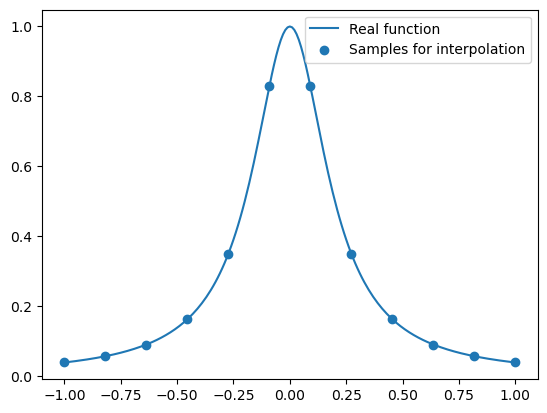

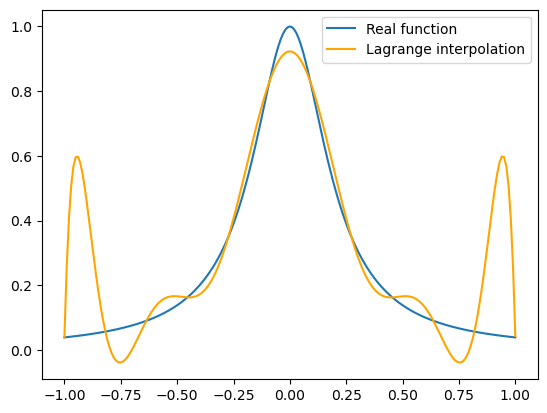

Error: 5.393099436297


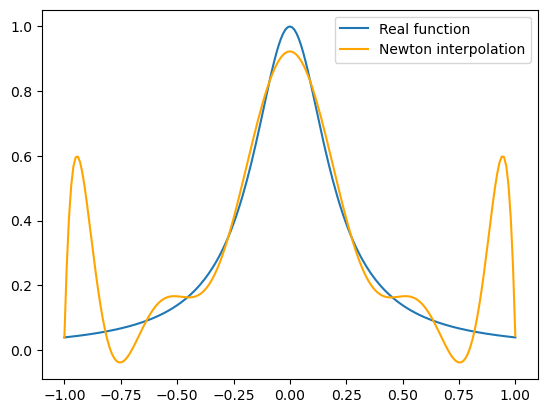

Error: 5.393099436297636


In [469]:
f = lambda t: 1 / (1 + 25 * (t ** 2))

num_points = 11
start, end = -1, 1

x_i = uniform_points(num_points, start, end)
y_i = f(x_i)

real = {"x": uniform_points(200, start, end)}
real["y"] = f(real["x"])

plt.plot(real["x"], real["y"], label="Real function")
plt.scatter(x_i, y_i, label="Samples for interpolation")
plt.legend(loc="upper right")
plt.show()

test_interpolation(f, interpolate_lagrange, "Lagrange interpolation", num_points, start, end)
test_interpolation(f, interpolate_newton, "Newton interpolation", num_points, start, end)

c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

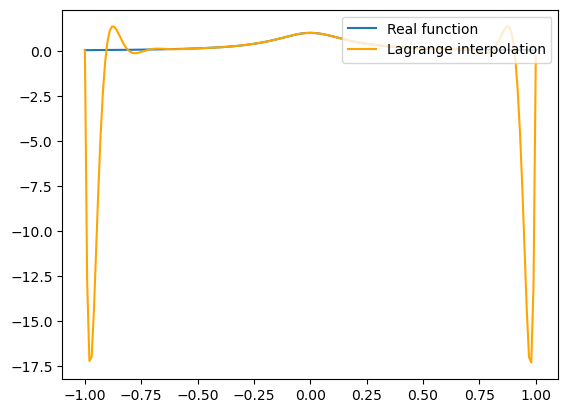

Error: 2357.993617183352


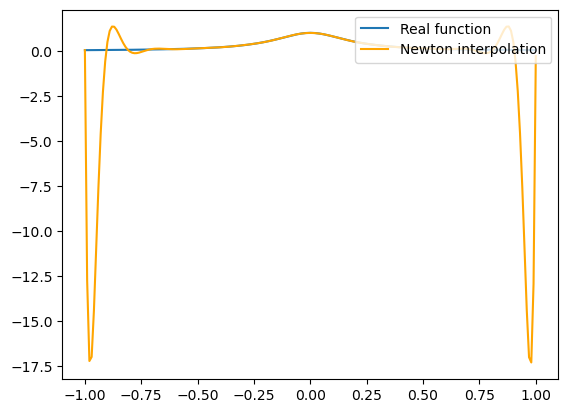

Error: 2357.993617204443


In [369]:
num_points = 21

test_interpolation(f, interpolate_lagrange, "Lagrange interpolation", num_points)
test_interpolation(f, interpolate_newton, "Newton interpolation", num_points)

d) Usando a função scipy.interpolate.interp1d calcule a interpolação usando _spline_ linear e cúbica. Exiba
os gráficos e comente as diferenças das soluções deste item para os anteriores.


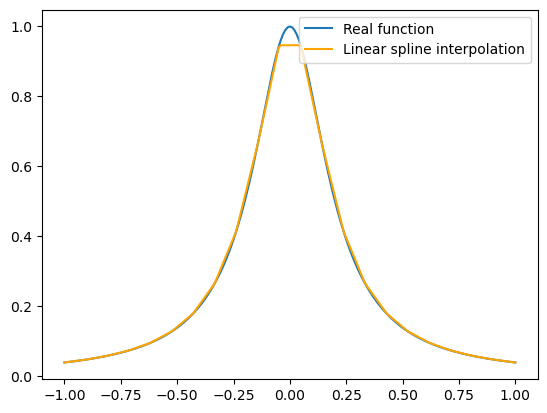

Error: 0.019160365675677197


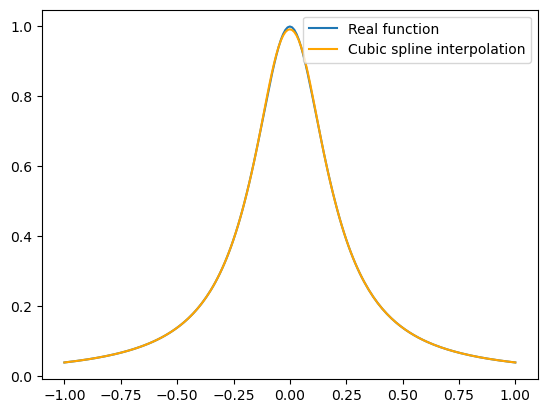

Error: 0.000494109648023252


In [370]:
linear = lambda x, y: scipy.interpolate.interp1d(x, y, kind="linear", fill_value="extrapolate")
cubic = lambda x, y: scipy.interpolate.interp1d(x, y, kind="cubic", fill_value="extrapolate")

test_interpolation(f, linear, "Linear spline interpolation", num_points)
test_interpolation(f, cubic, "Cubic spline interpolation", num_points)

e) Repita os itens b) e c) com nós de Chebyshev.

In [371]:
def non_uniform_points(num_points, start, end):
    return numpy.array([
        (start + end) / 2 + (end - start) / 2 * numpy.cos((2 * i + 1) / (2 * num_points + 2) * numpy.pi) for i in
        range(num_points)
    ])

200


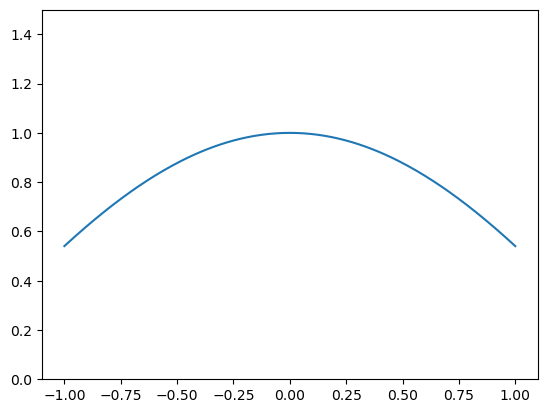

In [372]:
x_i = non_uniform_points(200, -1, 1)
print(len(x_i))
plt.plot(x_i, numpy.cos(x_i))
plt.ylim([0, 1.5])
plt.show()

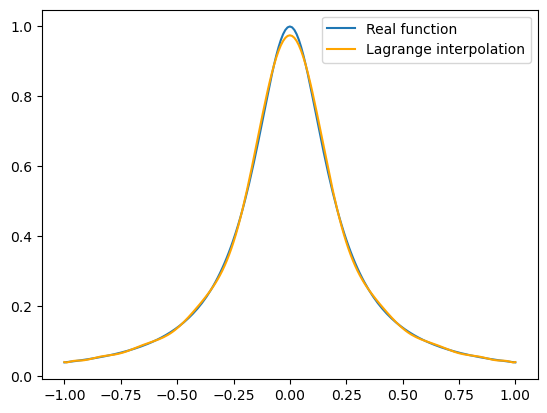

Error: 0.010015155914584238


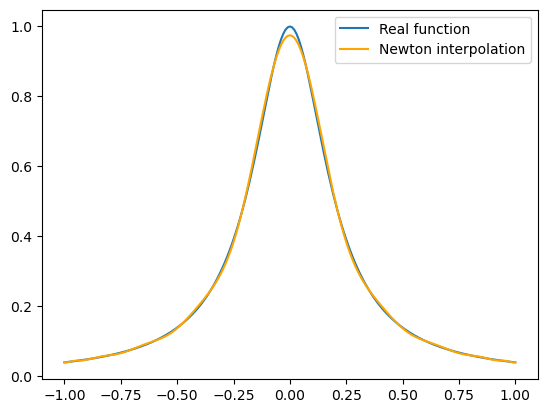

Error: 0.010015155914597023


In [373]:
num_points = 21

test_interpolation(f, interpolate_lagrange, "Lagrange interpolation", num_points, points_function=non_uniform_points)
test_interpolation(f, interpolate_newton, "Newton interpolation", num_points, points_function=non_uniform_points)

## 3) Mínimos Quadrados

In [391]:
def mmq(x, y, k):
    X = numpy.vander(x, k)
    A = X.T.dot(X)
    b = X.T.dot(y)
    a = numpy.linalg.solve(A, b)
    return a

def mmq_qr(x, y, k):
    X = numpy.vander(x, k)
    (Q, R) = numpy.linalg.qr(X)
    b = Q.T.dot(y)
    a = numpy.linalg.solve(R, b)
    return a

a) Explique cada um dos códigos dados acima. O que está sendo calculado ?

Ambos os códigos recebem uma lista de valores para x e y, ou seja, pontos bidimensionais.
Aquém, recebem uma constante k que será explicada a frente.

Em primeiro lugar, ambos os códigos calculam a matriz de Vandermond, que é definida da seguinte forma:

$$
x = [3, 4, 7],\\

V =
\begin{bmatrix}
1 & x_{0}^{1} & x_{0}^{2}\\
1 & x_{1}^{1} & x_{1}^{2}\\
1 & x_{2}^{1} & x_{2}^{2}
\end{bmatrix}
=
\begin{bmatrix}
1 & 3 & 9\\
1 & 4 & 16 \\
1 & 7 & 49
\end{bmatrix}
$$

Em seguida, buscando obter os valores que minimizem a diferença entre uma função $f$ qualquer e um polinomial $P_{n}$
Ou seja, tal que:

$$
Q = min_{\alpha\ast} ||f− P_{n}||^{2}
$$

Simplificando, temos que $A\cdot a = b$, onde $A = V^{T} \cdot V$ e analogamente $b = V^{T} \cdot y$.
E em forma matricial:

$$
\begin{bmatrix}
\langle x_{0}, x_{0} \rangle & ... & \langle x_{0}, x_{n} \rangle\\
... & ... & ... \\
\langle x_{n}, x_{0} \rangle & ... & \langle x_{n}, x_{n} \rangle
\end{bmatrix}
\cdot
\begin{bmatrix}
a_{0}^{\ast}\\
a_{1}^{\ast}\\
...\\
a_{n}^{\ast}
\end{bmatrix}
=
\begin{bmatrix}
\langle x_{0}, y \rangle\\
\langle x_{1}, y \rangle\\
... \\
\langle x_{n}, y \rangle
\end{bmatrix}
$$


Assim, resolve-se o sistema usando qualquer método de solução de sistemas lineares adequado, achando os parâmetros $a_{0}^{\ast}, a_{1}^{\ast}, ..., a_{n}^{\ast}$, que definem o polinômio:

$$
P_{n} = a_{0}^{\ast} + a_{1}^{\ast}x + ... + a_{n}^{\ast}x^{n}
$$

b) Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020
a 18 de junho de 2020, por uma função $g(x) = ab^{x}$, com a, b ∈ R. Use um dos códigos dados acima.

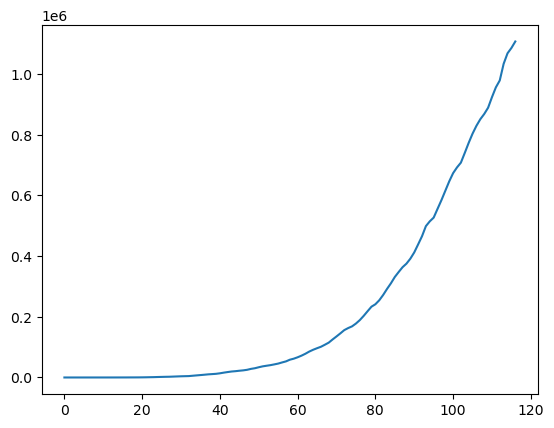

In [378]:
data = pandas.read_csv("casosacumuladosbrasilatuaizado.txt")
plt.plot(data)
plt.show()

10.079935902838828


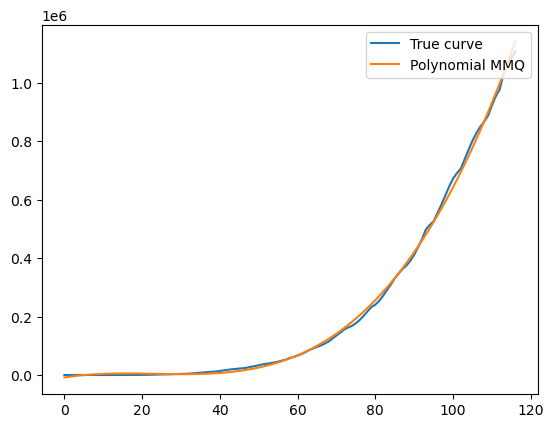

14.298114938394363


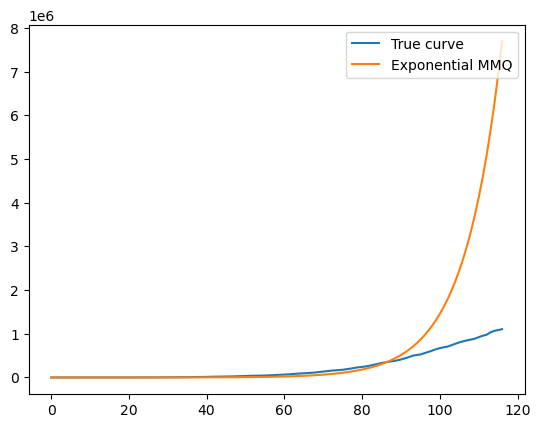

In [471]:
x = numpy.array(data.index)
y = numpy.array(data["1"])

a_3, a_2, a_1, a_0 = mmq(x, y, 4)

y_pred_polynomial = a_0 + a_1 * x + a_2 * (x ** 2) + a_3 * (x ** 3)

a_1, a_0 = mmq(x, numpy.log(y), 2)
a = numpy.exp(a_0)
b = numpy.exp(a_1)

y_pred_exponential = a * numpy.power(b, x)

print(numpy.log10(error(y, y_pred_polynomial)))
plt.plot(x, y, label="True curve")
plt.plot(x, y_pred_polynomial, label="Polynomial MMQ")
plt.legend(loc="upper right")
plt.show()

print(numpy.log10(error(y, y_pred_exponential)))
plt.plot(x, y, label="True curve")
plt.plot(x, y_pred_exponential, label="Exponential MMQ")
plt.legend(loc="upper right")
plt.show()

c) Repita o item b) usando apenas os 20 primeiros dias.

3.529461267031985


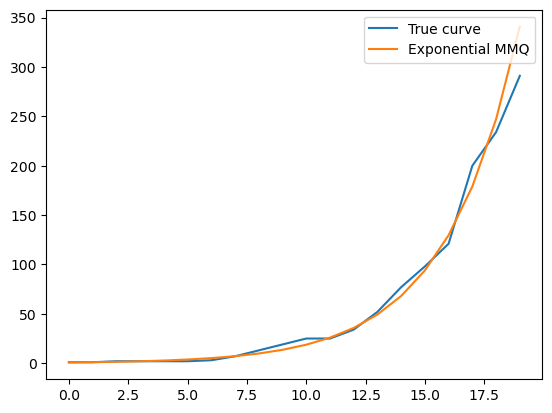

In [476]:
a_1, a_0 = mmq(x[:20], numpy.log(y[:20]), 2)
a = numpy.exp(a_0)
b = numpy.exp(a_1)

y_pred_exponential = a * numpy.power(b, x)

print(numpy.log10(error(y[:20], y_pred_exponential[:20])))
plt.plot(x[:20], y[:20], label="True curve")
plt.plot(x[:20], y_pred_exponential[:20], label="Exponential MMQ")
plt.legend(loc="upper right")
plt.show()

d) Repita o ítem b) usando apenas os 50 últimos dias.

11.249892650724334


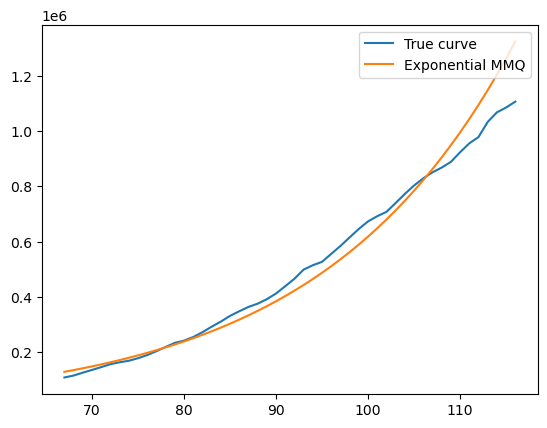

In [477]:
a_1, a_0 = mmq(x[-50:], numpy.log(y[-50:]), 2)
a = numpy.exp(a_0)
b = numpy.exp(a_1)

y_pred_exponential = a * numpy.power(b, x)

print(numpy.log10(error(y[-50:], y_pred_exponential[-50:])))
plt.plot(x[-50:], y[-50:], label="True curve")
plt.plot(x[-50:], y_pred_exponential[-50:], label="Exponential MMQ")
plt.legend(loc="upper right")
plt.show()

e) Compare os ítens b), c) e d). Que tipo de informação os dados nos fornecem ?

Comparando os gráficos gerados no item b), é perceptível como a relação de crescimento de casos acumulados da Covid aparenta ser melhor bem modelado por uma equação cúbica do que uma exponencial, pelo menos considerando um longo período (de quase 120 dias).

Após fazer a aproximação dos 20 primeiros dias por uma exponencial, percebe-se um erro muito menor, de aproximadamente 3 unidades de medida. Assim, pode-se afirmar que o crescimento do vírus possivelmente segue uma exponencial.

Contudo, analisando os últimos 50 dias, o erro aumenta. Para entender essa mudança, é importante notar que no começo da pandemia, que corresponde ao início dos dados usados, havia muito menos preocupações e medidas de segurança em andamento por parte do governo e da sociedade. Assim, o crescimento das contaminações estava muito mais irrestrito. Olhando mais a frente no tempo, dado uma adoção de novas medidas de segurança, o crescimento dos casos passa a ser mais restrito, possivelmente deixando de seguir uma relação exponencial (percebe-se que a quantidade de casos ao final está abaixo do crescimento esperado de uma relação exponencial).